Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Reading the data

In [4]:
df = pd.read_csv('Uber Request Data.csv')

Dataset

In [5]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


Shape of the dataset

In [6]:
df.shape

(6745, 6)

Checking for null value

In [7]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

Percentage Of Missing data

In [8]:
df.isnull().sum()/df.shape[0] * 100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

Description of data

In [9]:
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 8:37,12/7/2016 6:22
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


Basic information about the datatypes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


Two different types of dates value in the Request timestamp column

In [11]:
df['Request timestamp'].value_counts()

11/7/2016 8:37         6
11/7/2016 17:57        6
11/7/2016 9:40         6
11/7/2016 19:02        6
11/7/2016 20:47        5
                      ..
15-07-2016 08:41:35    1
13-07-2016 13:01:42    1
13-07-2016 18:14:22    1
13-07-2016 15:04:14    1
13-07-2016 19:19:23    1
Name: Request timestamp, Length: 5618, dtype: int64

Converting the column into datatime format

In [13]:
df['Request timestamp'] = df['Request timestamp'].astype(str)
df['Request timestamp'] = df['Request timestamp'].replace("/","-")
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst = True)
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst = True)

Get the hour from the column

In [14]:
df['req_hr'] = df['Request timestamp'].dt.hour

Get the day from the column

In [15]:
df['req_day'] = df['Request timestamp'].dt.day

Looking at the dataset

In [16]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


Trip Status for the different hours of the day

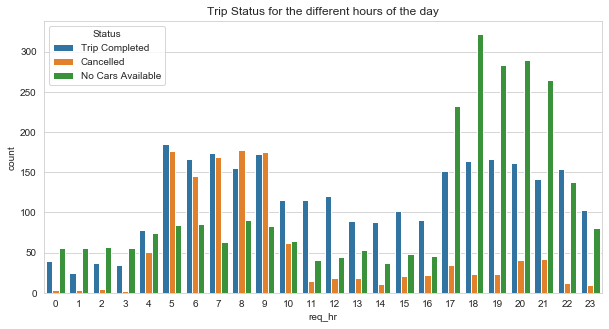

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['req_hr'], hue=df["Status"])
plt.title('Trip Status for the different hours of the day')
plt.show()

## We see that in between 4 AM and 9 AM the number of trips completed and cancelled is almost equal.
## We also see that unavailability of cars is the highest in between 5PM and 12 PM. 

Trip Pickup Points per hours

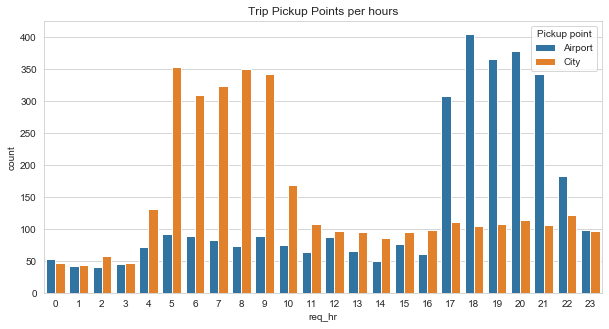

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['req_hr'], hue=df['Pickup point'])
plt.title('Trip Pickup Points per hours')
plt.show()

## The most number of pickups in the city is between 5AM to 9 AM and the most number of pickups from the airport is in between 5PM to 12PM.

## Creating time solts for different hours of the day 
### Pre Morning: req_hour<5
### Morning Rush:req_hour<10 &&  req_hour > 5
### Day_Time:req_hour<17 && req_hour > 10
### Evening_Rush:req_hour<22 && req_hour > 17
### Late_Night: Else all

In [18]:
df["Time_Slot"]=0
j=0
for i in df["req_hr"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1

In [19]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hr,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [20]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

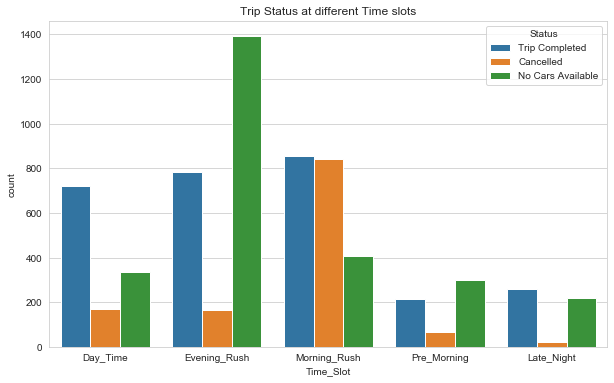

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=df)
plt.title('Trip Status at different Time slots')
plt.show()

## As mentioned above the most number of cancellation happened during the morning rush and most number of unavailability of cars is during the evening rush hour.

# Morning Rush 

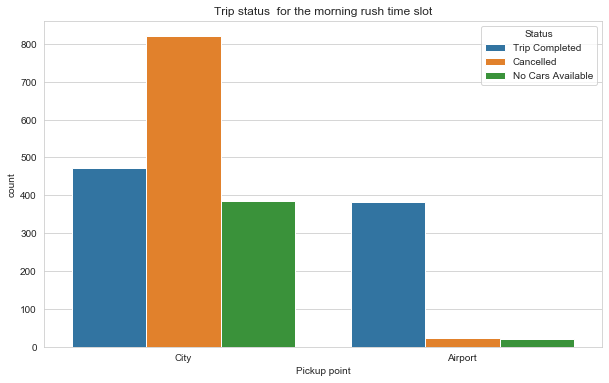

In [22]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)
plt.title('Trip status  for the morning rush time slot')
plt.show()

# Morning Rush- city

In [23]:
print('Total number of trips during the morning rush where the pickup point is city:',df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0])
print('Number of trips during the morning rush which were cancelled status:',df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0])
print('Number of trips during the morning rush which were completed status:',df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0])
print('Number of trips during the morning rush were no cars available status:',df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0])

Total number of trips during the morning rush where the pickup point is city: 1677
Number of trips during the morning rush which were cancelled status: 820
Number of trips during the morning rush which were completed status: 472
Number of trips during the morning rush were no cars available status: 385


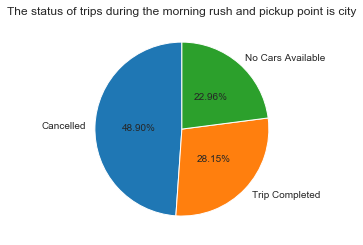

In [24]:
df_morning_city=df.loc[(df["Pickup point"]=="City")&(df["Time_Slot"]=="Morning_Rush")]
df_morning_city_count=pd.DataFrame(df_morning_city["Status"].value_counts())
fig,ax=plt.subplots()
ax.pie(df_morning_city_count["Status"].values,labels=df_morning_city_count["Status"].index,autopct="%.2f%%",startangle=90,pctdistance=0.5)
plt.title('The status of trips during the morning rush and pickup point is city')
plt.show()

## The most number of cancellation during the morning rush happened in the city pickups. This may be because the drivers might not wanna go to the destination location set by the customer. Also it might happen the car is not available at their nearby location. 

# Morning Rush- Airport

In [25]:
print('Total number of trips during the morning rush where the pickup point is airport:',df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0])
print('Number of trips during the morning rush which were cancelled status:',df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0])
print('Number of trips during the morning rush which were completed status:',df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0])
print('Number of trips during the morning rush were no cars available status:',df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0])

Total number of trips during the morning rush where the pickup point is airport: 426
Number of trips during the morning rush which were cancelled status: 23
Number of trips during the morning rush which were completed status: 382
Number of trips during the morning rush were no cars available status: 21


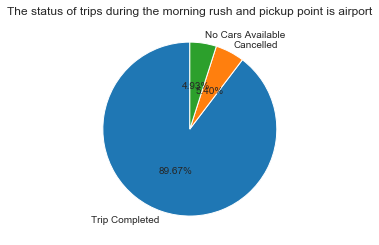

In [26]:
df_morning_airport=df.loc[(df["Pickup point"]=="Airport")&(df["Time_Slot"]=="Morning_Rush")]
df_morning_airport_count=pd.DataFrame(df_morning_airport["Status"].value_counts())
fig,ax=plt.subplots()
ax.pie(df_morning_airport_count["Status"].values,labels=df_morning_airport_count["Status"].index,autopct="%.2f%%",startangle=90,pctdistance=0.5)
plt.title('The status of trips during the morning rush and pickup point is airport')
plt.show()

## During the morning rush almost all the trips where pickup point is airport has been completed.

# Evening Rush

In [27]:
df_evening_rush=df[df['Time_Slot']=='Evening_Rush']
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]

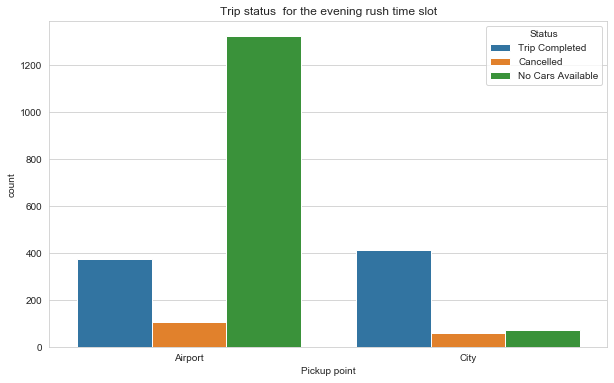

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)
plt.title('Trip status  for the evening rush time slot')
plt.show()

## Evening- Rush Airport

In [29]:
print('Total number of trips during the evening rush where the pickup point is airport:',df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0])
print('Number of trips during the evening rush which were cancelled status:',df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0])
print('Number of trips during the evening rush which were completed status:',df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0])
print('Number of trips during the evening rush were no cars available status:',df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0])

Total number of trips during the evening rush where the pickup point is airport: 1800
Number of trips during the evening rush which were cancelled status: 106
Number of trips during the evening rush which were completed status: 373
Number of trips during the evening rush were no cars available status: 1321


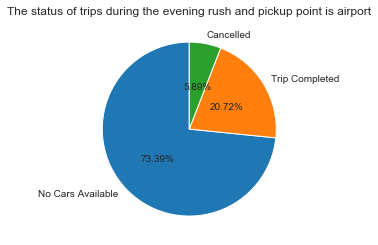

In [30]:
df_evening_airport=df.loc[(df["Pickup point"]=="Airport")&(df["Time_Slot"]=="Evening_Rush")]
df_evening_airport_count=pd.DataFrame(df_evening_airport["Status"].value_counts())
fig,ax=plt.subplots()
ax.pie(df_evening_airport_count["Status"].values,labels=df_evening_airport_count["Status"].index,autopct="%.2f%%",startangle=90,pctdistance=0.5)
plt.title('The status of trips during the evening rush and pickup point is airport')
plt.show()

## We see that there is a large number of unavailability of cars in the airport pickups.

## Evevning Rush City

In [31]:
print('Total number of trips during the evening rush where the pickup point is city:',df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0])
print('Number of trips during the evening rush which were cancelled status:',df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0])
print('Number of trips during the evening rush which were completed status:',df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0])
print('Number of trips during the evening rush were no cars available status:',df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0])

Total number of trips during the evening rush where the pickup point is city: 542
Number of trips during the evening rush which were cancelled status: 60
Number of trips during the evening rush which were completed status: 411
Number of trips during the evening rush were no cars available status: 71


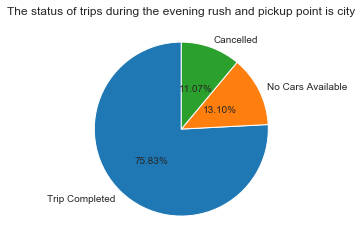

In [32]:
df_evening_city=df.loc[(df["Pickup point"]=="City")&(df["Time_Slot"]=="Evening_Rush")]
df_evening_city_count=pd.DataFrame(df_evening_city["Status"].value_counts())
fig,ax=plt.subplots()
ax.pie(df_evening_city_count["Status"].values,labels=df_evening_city_count["Status"].index,autopct="%.2f%%",startangle=90,pctdistance=0.5)
plt.title('The status of trips during the evening rush and pickup point is city')
plt.show()

## Above 70% of the trips in the evening rush with pickup location city were completed.

# The remedy of the problems:
## During the morning rush almost 50% of the trips with pickup location city were cancelled.
### These might be due to unavailability of cars at the customer location i.e. long wait time. This can be solved with increasing the number of cars in the areas with highest cancellation or more wait time. We can also see that  the drivers might cancel some trips because they dont want to go to the destination location. 
## During the evening rush there is a very high probability of customers  not getting an uber from the airport. 
### There can be several reasons regarding this. Generally many trips from the airport are to distant places from where the rider might not get a new customer. Uber should give incentives for these specific trips so as to increase the availabity of cars at the airport.